In [1]:
%matplotlib inline

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.notebook_repr_html', False)

In [3]:
plt.style.use('seaborn-white')

In [4]:
adv=pd.read_csv("Advertising.csv")

In [5]:
adv.describe()

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Linear Plots 

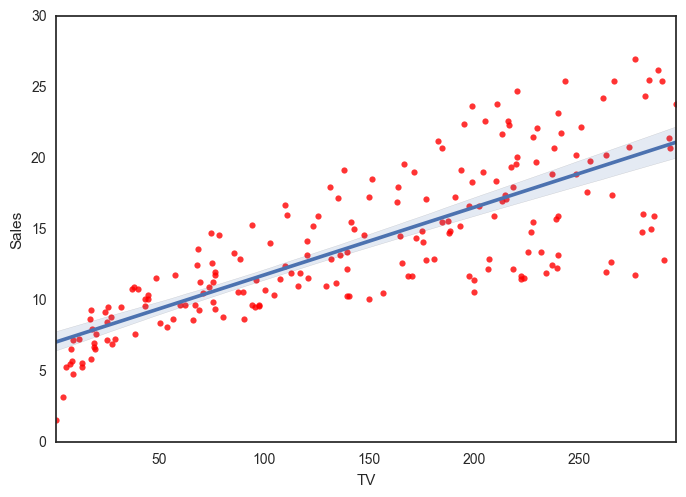

In [24]:
sns.regplot(adv.TV,adv.Sales,order=1,scatter_kws={'color':'r'})
plt.xlim(min(adv.TV),max(adv.TV))
plt.ylim(ymin=0);

(0, 30.0)

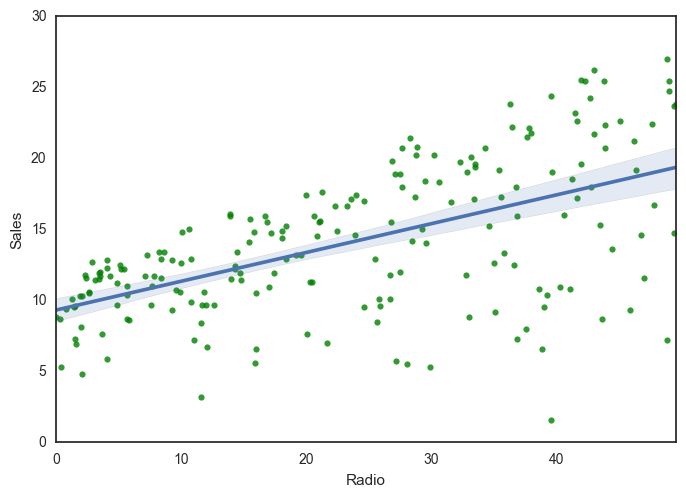

In [32]:
sns.regplot(adv.Radio,adv.Sales,order=1,scatter_kws={'color':'g'})
plt.xlim(min(adv.Radio),max(adv.Radio))
plt.ylim(ymin=0)

# Regression Coeffiecients

Q-Why should you center before scaling? 
A-In regression, it is often recommended to center the variables so that the predictors have mean 0. This makes it so the intercept term is interpreted as the expected value of Yi when the predictor values are set to their means. Otherwise, the intercept is interpreted as the expected value of Yi when the predictors are set to 0, which may not be a realistic or interpretable situation. This is especially important in cases where neither of the two variables can ever be zero in any practical case. In the above example of TV and advertisement, the Radio,TV and sales values can be zero (i.e if something is obviously not selling), but I shall demonstrate the same plot without scaling separatley. 

## Coefficient confidence plots (contour and mesh)

In [83]:
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
#Numpy's meshgrid is very useful for converting two vectors to a coordinate grid
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))
#Z=np.ndenumerate(Z)
# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

In [93]:
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.reshape(-1,1))**2)/1000
min_rss

c:\python27\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


2.1025305831313514

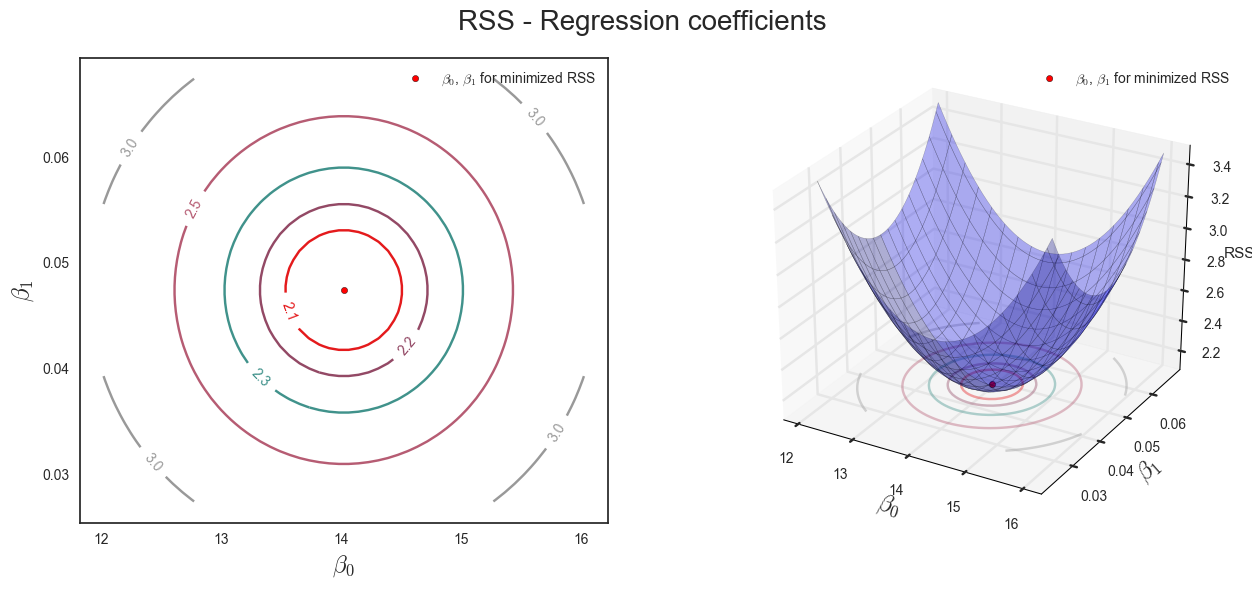

In [94]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

## Using StatsModels

In [95]:
est = smf.ols('Sales ~ TV', adv).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,7.0326,0.458,15.360,0.000,6.130 7.935
TV,0.0475,0.003,17.668,0.000,0.042 0.053


In [96]:
((adv.Sales - (est.params[0] + est.params[1]*adv.TV))**2).sum()/1000

2.102530583131351

## Using scikit Learn

In [97]:
regr = lm.LinearRegression()
##RSS Calculation
X = scale(adv.TV, with_mean=True, with_std=False).reshape(-1,1) ## Get any array(Md) into a single column vector 
y = adv.Sales
X_0=scale(adv.TV,with_mean=False,with_std=False).reshape(-1,1)
X_0=X_0.reshape(-1,1)

In [98]:
#Regression with scaling-Setting value of the intercept when predictors are set to the 0, i.e on the Y axis alone, the value
#is zero 
regr.fit(X,y)
print (regr.intercept_)
print (regr.coef_)[0]
print(regr.score(X,y)) #R^2 value 

14.0225
0.047536640433
0.61187505085


In [99]:
#Regression with scaling-Setting value of the intercept when predictors are set to the mean, i.e on the Y axis alone, the value
#is the mean of the predictors 
regr.fit(X_0,y)
print(regr.intercept_)
print(regr.coef_)[0]
print(regr.score(X_0,y)) #R^2 value 

7.03259354913
0.047536640433
0.61187505085


# Multiple Regression 